In [169]:
import numpy as np

$\textbf{Defining a positive definite matrix}$

In [170]:
# 'A' matrix is the covariance matrix
sigma_alpha = 3.427; sigma_n = 0.463; sigma_eps = 254.0;
r_alpha_n = -0.99972; r_alpha_eps = 0.999996; r_n_eps = -0.99965;
A =np.array([[sigma_alpha**2,r_alpha_n*sigma_alpha*sigma_n,r_alpha_eps*sigma_alpha*sigma_eps],[r_alpha_n*sigma_alpha*sigma_n,sigma_n**2,r_n_eps*sigma_n*sigma_eps],[r_alpha_eps*sigma_alpha*sigma_eps,r_n_eps*sigma_n*sigma_eps,sigma_eps**2]])
A

array([[ 1.17443290e+01, -1.58625672e+00,  8.70454518e+02],
       [-1.58625672e+00,  2.14369000e-01, -1.17560839e+02],
       [ 8.70454518e+02, -1.17560839e+02,  6.45160000e+04]])

In [171]:
def cholesky_d(A):
    L = np.zeros_like(A)
    n = len(L)
    for i in range(n):
        for j in range(i+1):
            if i==j:
                val = A[i,i] - np.sum(np.square(L[i,:i]))
                # if diagonal values are negative return zero - not throw exception
                if val<0:
                    return 0.0
                L[i,i] = np.sqrt(val)
            else:
                L[i,j] = (A[i,j] - np.sum(L[i,:j]*L[j,:j]))/L[j,j]
                
    return L

In [172]:
L1 = cholesky_d(A)

In [173]:
L2 = np.linalg.cholesky(A)

Checking the code for cholesky decomposition

In [174]:
# np.allclose(L1,L2)
B = np.dot(L1,np.transpose(L1))
print(B)

[[ 1.17443290e+01 -1.58625672e+00  8.70454518e+02]
 [-1.58625672e+00  2.14369000e-01 -1.17560839e+02]
 [ 8.70454518e+02 -1.17560839e+02  6.45160000e+04]]


In [175]:
np.allclose(A,B)

True

In [176]:
# checking weather the cholesky decomposition is giving the same uncertainity
L = np.transpose(L1)
Q = np.array([[1],[np.log(220.0)],[-1.0/220]])
ans = np.dot(L,Q)
A_norm =(np.linalg.norm(ans))
A_norm

0.23095181044253602

The answer is same

In [177]:
#Required cholesky lower triangular matrix
L1

array([[ 3.42700000e+00,  0.00000000e+00,  0.00000000e+00],
       [-4.62870360e-01,  1.09558128e-02,  0.00000000e+00],
       [ 2.53998984e+02,  7.08469912e-01,  1.19152637e-01]])

$\textbf{Reaction 4: $O + C_2H_4 \rightarrow products$}$

$\overline{\alpha} = 16.422$

n = 1.88

$\epsilon/K$ = 92

300-1000 K : 0.1;

220 K : 0.3;

2000 K : 0.3;
    
$\textbf{CASE 1}$
\begin{align}
F(T) = M\sqrt{\sigma_{\alpha}^2 + \sigma_{n}^2*(ln(T))^{2} + 2*r_{\alpha n } \sigma_{\alpha} \sigma_{n}*ln(T)+ \sigma_{\epsilon}^2*T^{-2} - 2*r_{\alpha \epsilon} \sigma_{\alpha} \sigma_{\epsilon}T^{-1}-2*r_{\epsilon n } \sigma_{\epsilon} \sigma_{n}*ln(T)*T^{-1}}
\end{align}


In [178]:
import numpy as np
import scipy as sp
from scipy.optimize import minimize
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [179]:
def Objective (z4):
    M = 3/(np.log(10.0));
    f = np.zeros(10)
    y = np.array([0.3,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.3]);
    T = np.array([220.0,300.0,400.0,500.0,600.0,700.0,800.0,900.0,1000.0,2000.0]);
    f = (y)**2 - M**2*(z4[0]**2+2*z4[0]*z4[1]*np.log(T)+(z4[1]*np.log(T))**2-2*z4[0]*z4[3]/T-2*z4[1]*z4[3]*np.log(T)/T+(z4[3]/T)**2+(z4[2]*np.log(T))**2-2*z4[4]*z4[2]*np.log(T)/T+(z4[4]/T)**2+(z4[5]/T)**2)
    obj = np.dot(f,f);
    return obj
def cons1(z4):
    return (1-z4[3]**2-z4[4]**2-z4[5]**2+2*z4[3]*z4[4]*z4[5])

In [180]:
z4 = np.array([-10.0,-10.0,0.5,2000.0,10.0,5.0])
print(Objective(z4));

1093270563.4984243


In [181]:
sol = minimize(Objective,z4)

In [182]:
print(sol)

      fun: 1.316277510980899e-05
 hess_inv: array([[ 1.40972369e+03, -1.80779737e+02,  3.60706194e+00,
         9.79352593e+04, -1.18104322e+02, -6.54498527e+02],
       [-1.80779737e+02,  2.32187506e+01, -5.12539737e-01,
        -1.24787626e+04, -1.41577644e+02, -5.27987203e-01],
       [ 3.60706194e+00, -5.12539737e-01,  1.43613277e-01,
         1.05700523e+02,  3.99716752e+02,  1.88008434e+02],
       [ 9.79352593e+04, -1.24787626e+04,  1.05700523e+02,
         7.06948561e+06, -5.34967584e+05, -3.60524691e+05],
       [-1.18104322e+02, -1.41577644e+02,  3.99716752e+02,
        -5.34967584e+05,  1.45627920e+06,  8.28200543e+05],
       [-6.54498527e+02, -5.27987225e-01,  1.88008434e+02,
        -3.60524691e+05,  8.28200543e+05,  5.32993701e+05]])
      jac: array([ 2.16150738e-07,  2.25870224e-06,  1.69295629e-06,  1.06797415e-09,
       -4.25984581e-10,  5.07952791e-10])
  message: 'Optimization terminated successfully.'
     nfev: 1360
      nit: 153
     njev: 170
   status: 0
  s

In [183]:
print(Objective(sol.x));

1.316277510980899e-05


In [184]:
Exact_sol = [3.427,-0.46287,1.09558128e-02,2.53998984e+02,7.08469912e-01,1.19152637e-01]
print(Objective(Exact_sol));

2.072595968450519e-05


<IPython.core.display.Javascript object>


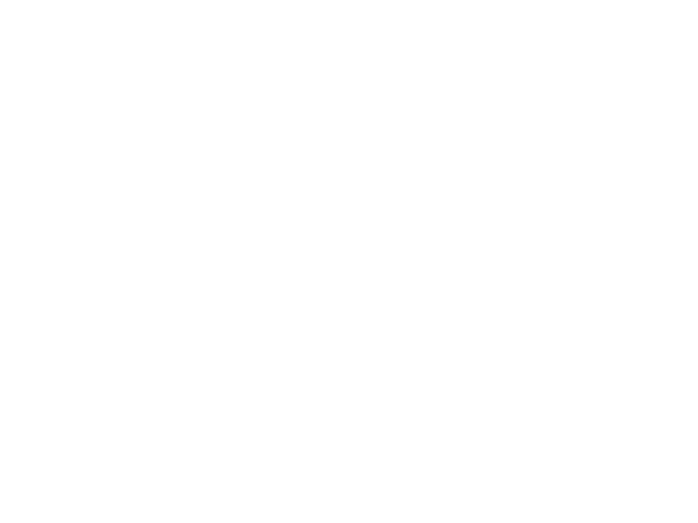

<IPython.core.display.Javascript object>


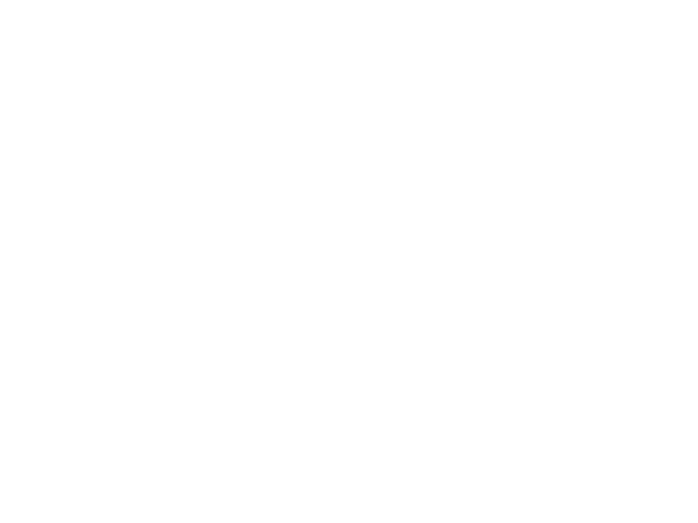

In [185]:
%matplotlib notebook
# sol.x = np.array([3.427,0.463,254,-0.99972,0.9999996,-0.99965])
Tu4 = [220,300,400,500,600,700,800,900,1000,2000];
fu4 = [0.3,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.3];
T4 = np.linspace(220,2000,1000);
M = 3/(np.log(10));
L11 = sol.x[0];
L21= sol.x[1];
L22= sol.x[2]
L31 =sol.x[3]
L32 =sol.x[4]
L33 =sol.x[5]
R4_L11 = Exact_sol[0];
R4_L21=  Exact_sol[1];
R4_L22=  Exact_sol[2]
R4_L31 = Exact_sol[3]
R4_L32 = Exact_sol[4]
R4_L33 = Exact_sol[5]
f4 = M*np.sqrt(L11**2+2*L11*L21*np.log(T4)+(L21*np.log(T4))**2-2*L11*L31/T4-2*L21*L31*np.log(T4)/T4+(L31/T4)**2+(L22*np.log(T4))**2-2*L32*L22*np.log(T4)/T4+(L32/T4)**2+(L33/T4)**2)
# f4_exact = M*np.sqrt(R4_L11**2+2*R4_L11*R4_L21*np.log(T4)+(R4_L21*np.log(T4))**2-2*R4_L11*R4_L31/T4-2*R4_L21*R4_L31*np.log(T4)/T4+(R4_L31/T4)**2+(R4_L22*np.log(4))**2-2*R4_L32*R4_L22*np.log(4)/T4+(R4_L32/T4)**2+(R4_L33/T4)**2)
# f4= M*np.sqrt(Sa**2+(Sn*np.log(T4))**2+(Se/T4)**(2)+2*Ran*Sa*Sn*np.log(T4)-2*Rae*Sa*Se/T4-2*Ren*Se*Sn*np.log(T4)/T4)
Ran_fixed = -1
Rae_fixed = 1
Ren_fixed = -1
# fx4= M*np.sqrt(Sa**2+(Sn*np.log(T4))**2+(Se/T4)**(2)+2*Ran_fixed*Sa*Sn*np.log(T4)-2*Rae_fixed*Sa*Se/T4-2*Ren_fixed*Se*Sn*np.log(T4)/T4)
fig = plt.figure(1)
plt.plot(T4,f4,'-')
# plt.plot(T4,f4_exact,'--')
plt.plot(Tu4,fu4,'o');
# plt.plot(T4,fx4,'--');
plt.ylim(0,0.4)
plt.show()
alpha = 16.422
n = 1.88
epsilon = 92
N = 1000
T4 = sp.linspace(220,2000,N);
k4 = alpha + n*np.log(T4)-epsilon*(1/T4)
fig = plt.figure(2)
plt.plot((1/T4),k4)
plt.plot((1/T4),np.log(10)*f4+k4)
plt.plot((1/T4),k4-np.log(10)*f4)
plt.show()

In [186]:
U = np.array([[L11,0,0],[L21,L22,0],[L31,L32,L33]]);

In [187]:
U_T = np.transpose(U)

In [188]:
Covar_Mat = np.dot(U,U_T);
Covar_Mat

array([[ 1.18386533e+01, -1.59668881e+00,  8.77999258e+02],
       [-1.59668881e+00,  2.15478609e-01, -1.18360543e+02],
       [ 8.77999258e+02, -1.18360543e+02,  6.52347587e+04]])

In [189]:
import numpy as np

In [190]:
# 'A' matrix is the covariance matrix
sigma_alpha = 1.008; sigma_n = 0.138; sigma_eps = 66.1;
r_alpha_n = -0.9936; r_alpha_eps = 0.9928; r_n_eps = -0.99997;
A5 =np.array([[sigma_alpha**2,r_alpha_n*sigma_alpha*sigma_n,r_alpha_eps*sigma_alpha*sigma_eps],[r_alpha_n*sigma_alpha*sigma_n,sigma_n**2,r_n_eps*sigma_n*sigma_eps],[r_alpha_eps*sigma_alpha*sigma_eps,r_n_eps*sigma_n*sigma_eps,sigma_eps**2]])

In [191]:
L2 = np.linalg.cholesky(A5)

In [192]:
L2

array([[ 1.00800000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.37116800e-01,  1.55879170e-02,  0.00000000e+00],
       [ 6.56240800e+01, -7.91398191e+00,  2.42929052e-01]])

$\textbf{Reaction 5: $H + CH_3 \rightarrow H_2 + ^1CH_2$}$

$\overline{\alpha} = 37.076$

n = -0.56

$\epsilon/K$ = 1350

300-1000 K : 0.15;

1000-1700 K : 0.3;

1700-2500 K : 0.2;
    
$\textbf{CASE 1}$
\begin{align}
F(T) = M\sqrt{\sigma_{\alpha}^2 + \sigma_{n}^2*(ln(T))^{2} + 2*r_{\alpha n } \sigma_{\alpha} \sigma_{n}*ln(T)+ \sigma_{\epsilon}^2*T^{-2} - 2*r_{\alpha \epsilon} \sigma_{\alpha} \sigma_{\epsilon}T^{-1}-2*r_{\epsilon n } \sigma_{\epsilon} \sigma_{n}*ln(T)*T^{-1}}
\end{align}


In [193]:
import numpy as np
from scipy.optimize import minimize
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [194]:
# def Objective (z5):
#     M = 3/(np.log(10.0));
#     f = np.zeros(10)
#     y = np.array([0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]);
#     Lambda_1= z5[0];
#     Lambda_2= z5[1];
#     Lambda_3= z5[2];
#     e11 = z5[3];
#     e21 = z5[4];
#     e31 = z5[5];
#     e12 = z5[6];
#     e22 = z5[7];
#     e32 = z5[8];
#     e13 = z5[9];
#     e23 = z5[10];
#     e33 = z5[11];
#     T = np.array([300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400,2500]);
#     Eigen = np.array([Lambda_1,0,0],[0,Lambda_2,0],[0,0,Lambda_3]);
#     theta_transpose = np.transpose(theta);
#     Omega_transpose = np.transpose(Omega);
#     K = omega_1 + omega_2*np.log(T) - omega_3/T;
#     L = np.dot(Eigen,K);
#     M = np.dot(Omega,L);
#     N = np.dot(theta_transpose,M);
#     Sigma = np.sqrt(N);
#     f = (y/M)**2 - (N);
#     obj = np.dot(f,f);
#     return obj

In [195]:
def Objective (z5):
    M = 3/(np.log(10.0));
    f = np.zeros(10)
    y = np.array([0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]);
    T = np.array([300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400,2500]);
    f = (y/M)**2 - (z5[0]**2+2*z5[0]*z5[1]*np.log(T)+(z5[1]*np.log(T))**2-2*z5[0]*z5[3]/T-2*z5[1]*z5[3]*np.log(T)/T+(z5[3]/T)**2+(z5[2]*np.log(T))**2-2*z5[4]*z5[2]*np.log(T)/T+(z5[4]/T)**2+(z5[5]/T)**2)
    obj = np.dot(f,f);
    return obj

In [196]:
z5 = np.array([-10.0,-10.0,0.5,200.0,10.0,5.0,1,1,1,1,1,1])
print(Objective(z5));

1031506985.5159463


In [197]:
sol_R5 = minimize(Objective,z5)

In [198]:
print(Objective(sol_R5.x));

0.00011450157626515694


In [199]:
Exact_sol_R5 = [1.00800000e+00,-1.37116800e-01,1.55879170e-02,6.56240800e+01,-7.91398191e+00,2.42929052e-01]
print(Objective(Exact_sol_R5));

0.0005877681892990171


<IPython.core.display.Javascript object>


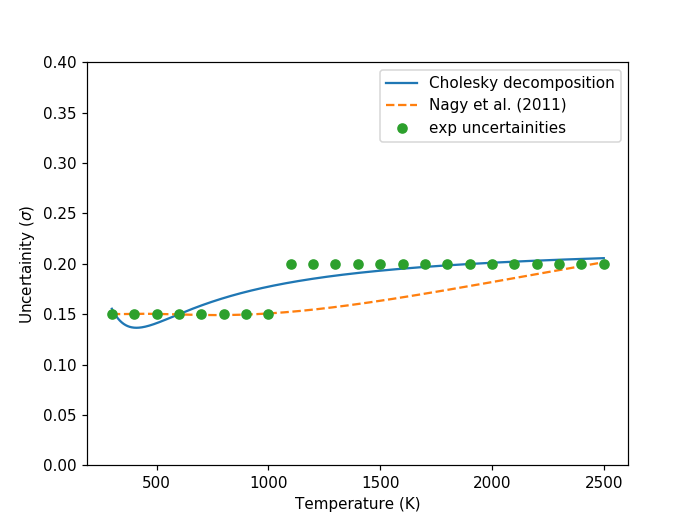

<IPython.core.display.Javascript object>


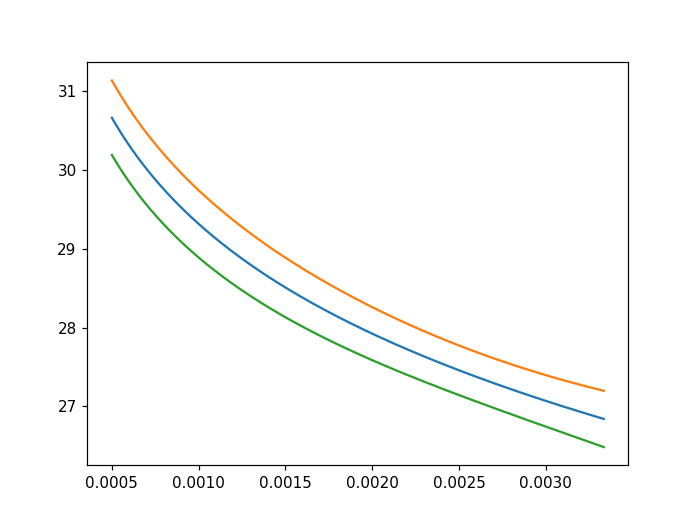

In [200]:
%matplotlib notebook
# sol_R5.x = np.array([3.427,0.463,254,-0.99972,0.9999996,-0.99965])
Tu5 = np.array([300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400,2500]);
fu5 = np.array([0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]);
T5 = np.linspace(300,2500,1000);
M = 3/(np.log(10));
R5_L11 = sol_R5.x[0];
R5_L21= sol_R5.x[1];
R5_L22= sol_R5.x[2]
R5_L31 =sol_R5.x[3]
R5_L32 =sol_R5.x[4]
R5_L33 =sol_R5.x[5]
R5_11 = Exact_sol_R5[0];
R5_21= Exact_sol_R5[1];
R5_22= Exact_sol_R5[2]
R5_31 =Exact_sol_R5[3]
R5_32 =Exact_sol_R5[4]
R5_33 =Exact_sol_R5[5]
f5 = M*np.sqrt(R5_L11**2+2*R5_L11*R5_L21*np.log(T5)+(R5_L21*np.log(T5))**2-2*R5_L11*R5_L31/T5-2*R5_L21*R5_L31*np.log(T5)/T5+(R5_L31/T5)**2+(R5_L22*np.log(T5))**2-2*R5_L32*R5_L22*np.log(T5)/T5+(R5_L32/T5)**2+(R5_L33/T5)**2)
f5_exact = M*np.sqrt(R5_11**2+2*R5_11*R5_21*np.log(T5)+(R5_21*np.log(T5))**2-2*R5_11*R5_31/T5-2*R5_21*R5_31*np.log(T5)/T5+(R5_31/T5)**2+(R5_22*np.log(T5))**2-2*R5_32*R5_22*np.log(T5)/T5+(R5_32/T5)**2+(R5_33/T5)**2)

# f5= M*np.sqrt(Sa**2+(Sn*np.log(T5))**2+(Se/T5)**(2)+2*Ran*Sa*Sn*np.log(T5)-2*Rae*Sa*Se/T5-2*Ren*Se*Sn*np.log(T5)/T5)
Ran_fixed = -1
Rae_fixed = 1
Ren_fixed = -1
# fx5= M*np.sqrt(Sa**2+(Sn*np.log(T5))**2+(Se/T5)**(2)+2*Ran_fixed*Sa*Sn*np.log(T5)-2*Rae_fixed*Sa*Se/T5-2*Ren_fixed*Se*Sn*np.log(T5)/T5)
fig = plt.figure(1)
plt.xlabel('Temperature (K)')
plt.ylabel('Uncertainity ($\sigma$)')
plt.plot(T5,f5,'-',label='Cholesky decomposition')
plt.plot(T5,f5_exact,'--',label='Nagy et al. (2011)')
plt.plot(Tu5,fu5,'o',label='exp uncertainities');
# plt.title(label ='objective (Nagy et al.) =0.0005877681892990171; objective (Cholesky decomposition) =0.00011450157626515694')
# plt.title(label ='objective (Cholesky decomposition) =0.00011450157626515694')
# plt.plot(T5,fx5,'--');
plt.ylim(0,0.4)
plt.legend()
plt.show()
alpha = 16.422
n = 1.88
epsilon = 92
N = 1000
T5 = sp.linspace(300,2000,N);
k5 = alpha + n*np.log(T5)-epsilon*(1/T5)
fig = plt.figure(2)
plt.plot((1/T5),k5)
plt.plot((1/T5),np.log(10)*f5+k5)
plt.plot((1/T5),k5-np.log(10)*f5)
plt.show()